# Review module

**Instructions**

In order to complete this review module, we recommend you follow these instructions:

1. Complete the functions provided to you in this notebook, but do **not** change the name of the function or the name(s) of the argument(s). If you do that, the autograder will fail and you will not receive any points.
2. Run all the function-definition cells before you run the testing cells. The functions must exist before they are graded!
3. Read the function docstrings carefully. They contain additional information about how the code should look (a [docstring](https://www.datacamp.com/community/tutorials/docstrings-python) is the stuff that comes between the triple quotes).
4. Some functions may require several outputs (the docstrings tell you which ones). Make sure they are returned in the right order.

In [1]:
!pip install -r requirements.txt

  Using cached matplotlib-3.5.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached statsmodels-0.13.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.9 MB)
  Using cached scikit_learn-1.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (31.2 MB)
     |████████████████████████████████| 6.9 MB 4.6 MB/s eta 0:00:01
  Using cached kiwisolver-1.4.3-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached Pillow-9.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached scipy-1.8.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.6 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
  Using ca

## Exercise 1

This is a dataset of college admissions.

In [2]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("data/data.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


Create a logistic regression model that predicts `admit` from `gre`, `gpa`, and `rank` (`rank` measures the prestige of the institution - where 1 is the highest prestige ranking and 4 is the lowest prestige ranking). Don't forget to normalize `gre` and `gpa` by subtracting the mean and dividing by the standard deviation (call the new columns `gre_normalized`and `gpa_normalized`, respectively).

**Hint:** Use `df["Intercept"] = 1` to define the intercept that you have to pass to `statsmodels` to initialize the model.

In [7]:
df_tst = df.copy()
df_tst['gre_normalized'] = (df_tst['gre'] - df_tst['gre'].mean()) / df_tst['gre'].std()
df_tst['gpa_normalized'] = (df_tst['gpa'] - df_tst['gpa'].mean()) / df_tst['gpa'].std()

In [9]:
df_tst['Intercept'] = 1

model_tst = sm.Logit(df_tst['admit'], df_tst[['Intercept', 'gre_normalized', 'gpa_normalized', 'rank']])
model_res_tst = model_tst.fit()
model_res_tst.summary()

Optimization terminated successfully.
         Current function value: 0.574302
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Sat, 18 Jun 2022   Pseudo R-squ.:                 0.08107
Time:                        23:29:49   Log-Likelihood:                -229.72
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 8.207e-09
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5326      0.315      1.689      0.091      -0.086       1.151
gre_normalized     0.2650      0.126      2.101      0.036       0.018       0.512
gpa_normalized     0.2957      0.125      2.373      0.018       0.051       0.540
rank              -0.5600      0.127     -4.405      0.000      -0.809      -0.311
==================================================================================
"""

In [11]:
def fit_logistic_regression():
    """
    Create a logistic regression model
    and fit it to `df`. The model predicts
    `admit` from `gre`, `gpa`, and `rank`, and
    outputs `model_res`, which results from
    fitting the model to the dataset using the
    `.fit()` method.    
    """
    # YOUR CODE HERE
    df['gpa_normalized'] = (df['gpa'] - df['gpa'].mean()) / df['gpa'].std()
    df['gre_normalized'] = (df['gre'] - df['gre'].mean()) / df['gre'].std()
    df['Intercept'] = 1

    model = sm.Logit(df['admit'], df[['Intercept', 'gre_normalized', 'gpa_normalized', 'rank']])
    
    model_res = model.fit(disp=False) # We use disp=False to turn off verbosity
    return model_res

## Exercise 2

Use the `roc_curve` function from `sklearn` to calculate the ROC curve for the model you have just created. The function `calculate_roc()` as such should not plot the curve, but rather calculate its coordinates. We have provided you with additional code as a convenience to help check that your ROC looks correct. That plotting code is not part of your assignment, so it is not required that you modify it.

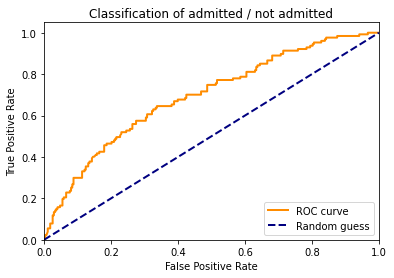

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


def calculate_roc(model_res):
    """
    Calculates the ROC curve for the logistic regression
    defined in the `fit_logistic_regression()` function
    
    Arguments:
    `model_res`: This is the output of the 
    `fit_logistic_regression()` function
    
    Output:
    `roc_p`: A tuple of numpy arrays generated by the
    `roc_curve()` function from sklearn.
    
    """
    
    # YOUR CODE HERE
    predict_p = model_res.predict(df[['Intercept', 'gre_normalized', 'gpa_normalized', 'rank']])
    roc_p = roc_curve(df['admit'], predict_p)
    return roc_p

    
# The code below is to help you visualize your curve - No need to modify it
model_res = fit_logistic_regression()
roc_p = calculate_roc(model_res)
plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange', lw=line_width, label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of admitted / not admitted')
plt.legend(loc='lower right')
plt.show()

## Exercise 3


Complete the function below to classify applicants depending on `gre`, `gpa` and `rank`. It should take a cut-off probability $p$ and classify applicants following this decision tree:

~~~plain
If predicted value is less than c, then classify as not admitted.
Classify as admitted otherwise.
~~~

Where $c$ is the cut-off value of your logistic regression.

**Hints:**
* Remember that your cut-off value $c$ is not the same as your cut-off probability $p$. $c$ is the log-odds of $p$ (you can use the `log` function from `numpy` to help you compute $c$).
* Notice also that your function must return an object of type `bool`.
* The function takes as inputs `gre` and `gpa` in their normalized versions, that is, after you've subtracted their means and divided by the respective standard deviations. You don't really need to doing anything about this, because the model you created in exercise 1 already uses normalized variables.
* We provided you with some code to help you check your results. You don't need to modify it.

In [13]:
import numpy as np

def classify(p, gre_norm, gpa_norm, rank):
    """
    Classify an applicant as admitted or not admitted
    depending on their gre, gpa and rank.
    
    Arguments:
    `p`: The cut-off probability
    `gre_norm`: The applicant's GRE, normalized.
    `gpa_norm`: The applicant's GPA, normalized.
    `rank`: The rank of the institution.
    
    Outputs:
    A boolean that is True if admitted, and False if not admitted.
    """

    l = fit_logistic_regression().params
    intercept, coef_gre, coef_gpa, coef_rank = l[0], l[1], l[2], l[3]

    # YOUR CODE HERE
    return (intercept + coef_gre*gre_norm + coef_gpa*gpa_norm + coef_rank*rank) >= np.log(p/(1-p))


# The code below is to help you check your results - No need to modify it
class_as_admitted = []
res = df[["gre_normalized", "gpa_normalized", "rank"]].sample(20)
for p in [0.1, 0.5, 0.9]:
    res["admitted_p_" + str(p)] = res[["gre_normalized", "gpa_normalized", "rank"]].apply(lambda x: classify(p, x[0], x[1], x[2]), axis=1)
res

,gre_normalized,gpa_normalized,rank,admitted_p_0.1,admitted_p_0.5,admitted_p_0.9
141,0.972155,0.341859,4,True,False,False
174,-0.759199,0.368135,4,True,False,False
331,0.625884,0.525795,3,True,False,False
135,-0.759199,0.473242,3,True,False,False
398,0.972155,0.683454,2,True,False,False
80,0.972155,-1.287291,4,True,False,False
22,0.106478,-1.497503,4,True,False,False
203,-1.451740,1.392922,4,True,False,False
198,0.106478,0.630901,3,True,False,False
54,0.625884,-0.131120,3,True,False,False


In [18]:
fit_logistic_regression().params

Intercept         0.532610
gre_normalized    0.264990
gpa_normalized    0.295706
rank             -0.560031
dtype: float64

In [17]:
0.532610+0.264990*(0.799020)+0.295706*(-0.735482)-0.560031*(2)>=np.log(0.9/(1-0.9))

False

## Testing Cells

Run the below cells to check your answers. Make sure you run your solution cells first before running the cells below, otherwise you will get a `NameError` when checking your answers.

In [14]:
# Ex. 1 (one point)
s = fit_logistic_regression().summary().tables[1].as_html()
sdf = pd.read_html(s,header=0,index_col=0)[0][["coef", "P>|z|"]]
co = list(sdf["coef"])
pr = list(sdf["P>|z|"])
assert 0.2957 in co, "Ex. 1 - For some reason, you obtained the wrong coefficient for gpa. Did you normalize the variables, created an Intercept and used the Logit function from statmodels? Check out the main case if you need to brush up!"
assert 0.2650 in co, "Ex. 1 - For some reason, you obtained the wrong coefficient for gre. Did you normalize the variables, created an Intercept and used the Logit function from statmodels? Check out the main case if you need to brush up!"
assert -0.5600 in co, "Ex. 1 - For some reason, you obtained the wrong coefficient for rank. Did you normalize the variables, created an Intercept and used the Logit function from statmodels? Check out the main case if you need to brush up!"
assert sum(sdf["P>|z|"] > 0.05) == 1, "Ex. 1 - For some reason, you obtained a wrong p-value for one or more of your explanatory variables. Did you normalize the variables, created an Intercept and used the Logit function from statmodels? Check out the main case if you need to brush up!"
print("Exercise 1 looks correct!")

Exercise 1 looks correct!


In [15]:
# Ex. 2 (one point)
from sklearn.metrics import auc
model_res = fit_logistic_regression()
roc_p = calculate_roc(model_res)
assert -0.01 < (auc( roc_p[0], roc_p[1] ) - 0.6921202157422629) < 0.01 , "Ex. 2 - We tried calculating your ROC's AUC, but it seems the numbers don't match! Please refer to the main case, section 'The Receiver Operating Characteristic (ROC) curve', to see how to compute a ROC curve."
print("Exercise 2 looks correct!")

Exercise 2 looks correct!


In [16]:
# Ex. 3 (one point)
class_as_admitted = []
for p in [0.1, 0.5, 0.9]:
    res = df[["gre_normalized", "gpa_normalized", "rank"]].apply(lambda x: classify(p, x[0], x[1], x[2]), axis=1)
    class_as_admitted.append(res.sum())

assert class_as_admitted == [385, 49, 0], "Ex. 3 - When we apply your function to the dataset, we get some unexpected results. Remember that a logistic regression is just logodds(p) = estimated_intercept + b1*v1 + ... + bn*vn where vn is variable n and bn its corresponding coefficient. Check out the main case for more information."
print("Exercise 3 looks correct!")

Exercise 3 looks correct!


## Attribution

"binary.csv" (dataset), Dec 16, 2013, UCLA Institute for Digital Research and Education - Statistical Consulting, [UCLA Statistical Consulting license](https://stats.idre.ucla.edu/ucla/about/), https://stats.idre.ucla.edu/r/dae/logit-regression/